<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2022-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para Ecuaciones Diferenciales Ordinarias<br> </h2>
<hr style="border:3px solid #E3AE00 "> </hr>

# Sistemas Hamiltonianos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def Euler_explicito(odefun, t_span, y0, h=None, return_trajectory=False): 
    '''
    Metodo de Euler explicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    if h is None: h = (tf-t0)/100
    yh = []; tn = [] 
    if return_trajectory: yh.append(y0); tn.append(0.0)
    
    while tf-t>1e-14:
        # Paso de Euler explicito
        y = y + h*odefun(t,y)
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
    if return_trajectory: 
        return (np.array(yh),tn) 
    else: 
        return y,t

### Ejemplo; oscilador armonico
\begin{equation}
\ddot{y} + a(y) = 0, 
\quad
\begin{cases}
\dot{q} = p &= H_{p}\\
\dot{p} = -a(q) &= -H_{q}
\end{cases},\quad
H(p,q) = \frac{1}{2}p^{2} - \int_{0}^{q}a(x) dx
\end{equation}

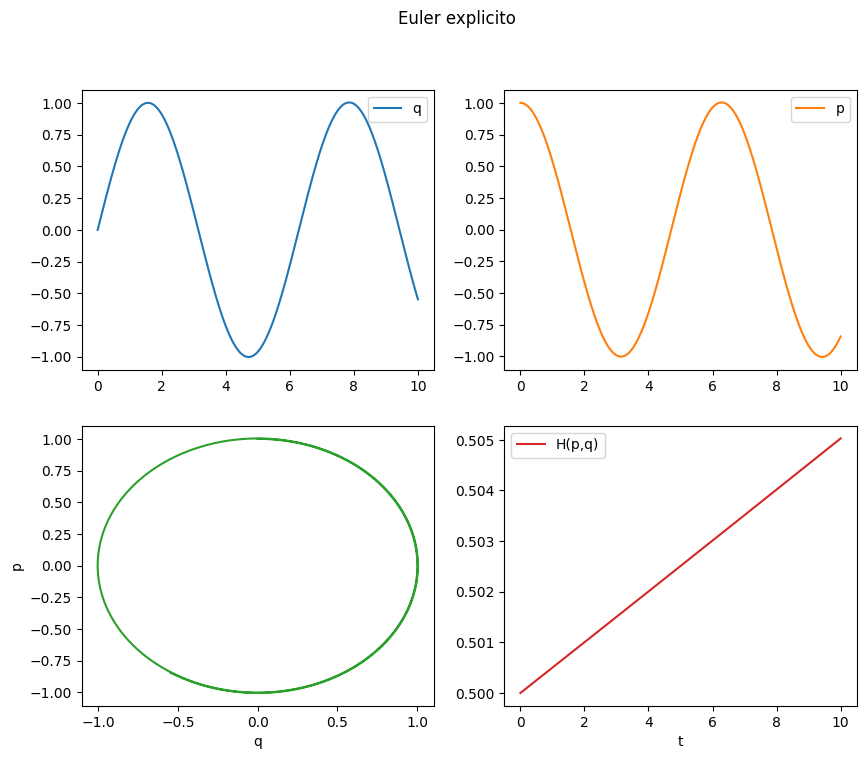

In [6]:
a = lambda q: q; H = lambda p,q: 0.5*p**2 + 0.5*q**2
# a = lambda q: np.sin(q); H = lambda p,q: 0.5*p**2 +1- np.cos(q) 
# a = lambda x: x*np.sin(x); H = lambda p,q: 0.5*p**2 + np.sin(q) - q*np.cos(q)
F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]

Y0 = np.array([.0,1.0], dtype=np.float64)
XM = 10.0
h = [0.001]
N = [int(XM/hi) for hi in h]

# Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
Y, x = Euler_explicito(odefun=F1, t_span=(0,XM), y0=Y0, h=h[0], return_trajectory=True)
q = np.asarray(Y)[:,0]
p = np.asarray(Y)[:,1]

fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Euler explicito')
ax[0,0].plot(x,q, color='C00', label='q')
ax[0,0].legend()
ax[0,1].plot(x,p, color='C01', label='p')
ax[0,1].legend()
ax[1,0].plot(q,p, color='C02')
ax[1,0].set_xlabel('q')
ax[1,0].set_ylabel('p')
ax[1,1].plot(x, H(p,q), color='C03', label='H(p,q)')
ax[1,1].set_xlabel('t')
ax[1,1].legend()
plt.show()

In [4]:
# Phase planes harmonic oscillator:
def phase_planes_harmonic_oscillator(a, axis = [-3,3,-3,3], XM = 20, h = 0.0001):
    F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]
    
    fig, ax = plt.subplots(1,1, figsize=(10,8))

    xlist = np.linspace(axis[0],axis[1],10)
    ylist = np.linspace(axis[2],axis[3], 5)
    Y0list = []
    for x in xlist:
        Y0list.append(np.array([x,0]))
    for y in ylist:
        Y0list.append(np.array([axis[0],y]))
 
    XM = 20.0
    h = [0.0001]
    N = [int(XM/hi) for hi in h]
    for Y0 in Y0list:
        Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
        q = np.asarray(Y)[:,0]
        p = np.asarray(Y)[:,1]
        ax.plot(q,p,'C00')
    plt.gca().set_aspect('equal')
    ax.set_xlim([axis[0],axis[1]])
    ax.set_ylim([axis[2],axis[3]])
    plt.show()

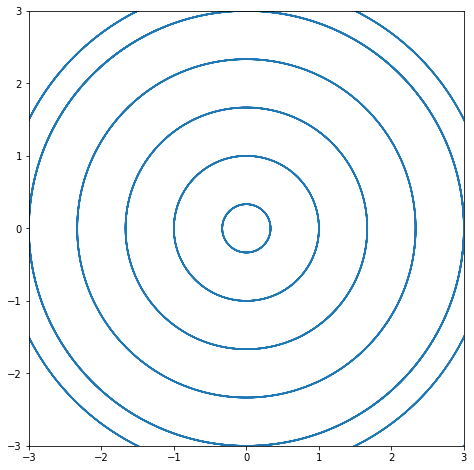

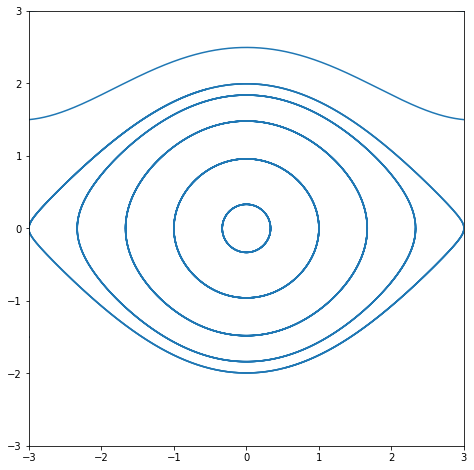

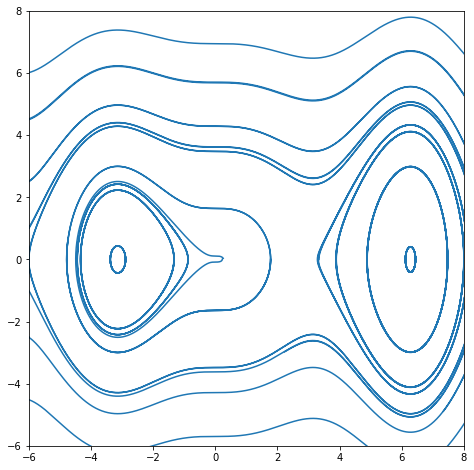

In [6]:
a1 = lambda x: x
a2 = lambda x: np.sin(x)
a3 = lambda x: x*np.sin(x)
phase_planes_harmonic_oscillator(a1)
phase_planes_harmonic_oscillator(a2)
phase_planes_harmonic_oscillator(a3, axis=[-6,8,-6,8])

In [13]:
def plot_blob_story(a, axis = [-2,2,-2,2], XM = 6, h = 0.0001):
    F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]
    
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    xc = 8.0/5.0
    r = 2.0/5.0
    xlist = np.linspace(xc-r,xc+r,30)
    xlistr = np.linspace(xc+r,xc-r,30)
    Y0list = []
    for x in xlist:
        Y0list.append(np.array([x,np.sqrt(r**2-(x-xc)**2)]))
    for x in xlistr:
        Y0list.append(np.array([x,-np.sqrt(r**2-(x-xc)**2)]))
 
    # plot initial condition
    q0 = np.asarray(Y0list)[:,0]
    p0 = np.asarray(Y0list)[:,1]
    ax.plot(q0,p0)
    
 
    N = int(XM/h)
    XMstages = np.linspace(0,XM,8)
    for xm in XMstages:
        qm = []
        pm = []
        for Y0 in Y0list:
            Y, x = Euler_explicito_multivariate(F1, Y0, N, xm, x0=0,h=h)
            q = np.asarray(Y)[:,0]
            p = np.asarray(Y)[:,1]
            qm.append(q[-1])
            pm.append(p[-1])
        
        ax.plot(qm,pm,'C00')
    plt.gca().set_aspect('equal')
    ax.set_xlim([axis[0],axis[1]])
    ax.set_ylim([axis[2],axis[3]])
    plt.show()

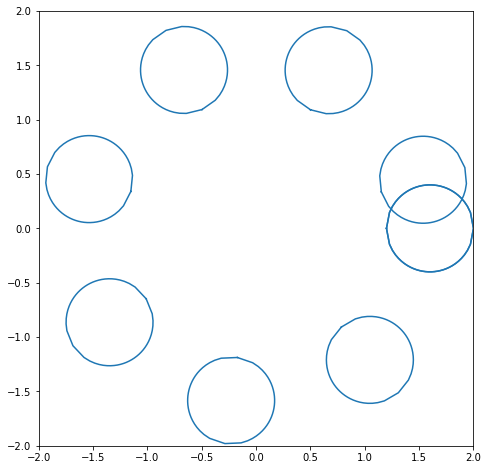

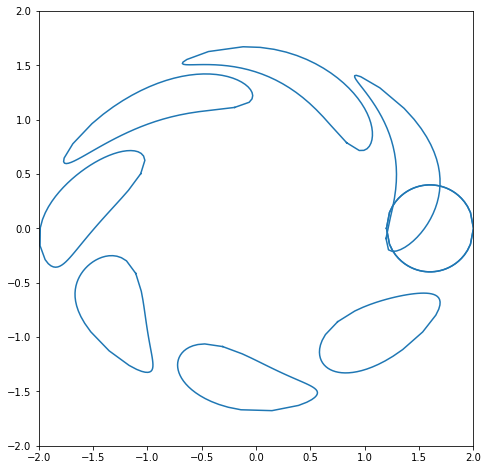

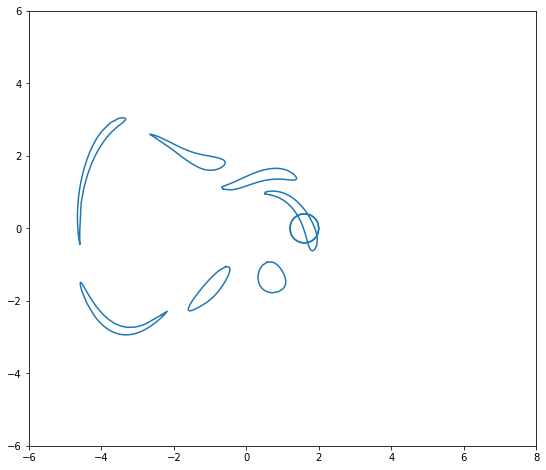

In [14]:
a1 = lambda x: x
a2 = lambda x: np.sin(x)
a3 = lambda x: x*np.sin(x)
plot_blob_story(a1)
plot_blob_story(a2, XM=7)
plot_blob_story(a3, XM=8, axis=[-6,8,-6,6])

### Example:
\begin{equation}
\ddot{y} + \sin(y) = 0, 
\quad
\begin{cases}
\dot{q} = p &= H_{p}\\
\dot{p} = -\sin(q) &= -H_{q}
\end{cases},\quad
H(p,q) = \frac{1}{2}p^{2} +\cos(q)
\end{equation}

punto medio implicito vs. Runge Kutta 3

In [2]:
def implicitmidpoint_multivariate(f, y0, N, XM, dfdy, x0=0, h=None):
    if h is None:
        h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    if np.isscalar(y0):
        I = 1.0
    else:
        I = np.eye(y0.size)
    for n in range(1,N+1):
        F = lambda y: y - yn - h*(f(xn+h/2.0,(yn+y)/2.0))
        Fprime = lambda y: I - h/2.0*dfdy(xn+h/2.0,(yn+y)/2.0)
        #F = lambda y: np.array([y[0] - yn[0] - h*(yn[1]+y[1])/2.0, y[1] - yn[1] + h*(yn[0]+y[0])/2.0])
        #Fprime = lambda y: I- h/2.0*np.array([[0,1],[-1,0]])
        yn,_ = newton_multivariate(F, X0=yn+h*f(xn,yn), Fprime=Fprime)
        #yn = np.linalg.solve(np.array([[-h/2.0, 1],[1,h/2.0]]) , np.array([[h/2.0, 1],[1,-h/2.0]]).dot(yn))
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def newton_multivariate(F, X0, Fprime, maxiter=10000, tol=1e-14):
    i = 0
    error = 1.0
    X = X0
    
    while np.any(abs(error)>tol) and i <maxiter:
        funeval = F(X)
        Jac = Fprime(X)
        #print(funeval)
        #print(Jac)
        alpha =0.1
        Xnew = X - alpha*np.linalg.solve(Jac, funeval)
    
        error = Xnew-X
        X = Xnew
        i += 1
    return X, F(X)
def RK3(F, y0, N, XM, x0=0): # A = [0,0,0;1/2,0,0;-1,2,0], c = [0,1/2,1], b = [1/6, 2/3, 1/6]
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    for n in range(1,N+1):
  
        K1 = F(xn, yn)
        K2 = F(xn+0.5*h, yn+h*0.5*K1)
        K3 = F(xn+h, yn+h*(-1*K1+2*K2))
        yn = yn+(h)*(1.0/6.0*K1+2.0/3.0*K2+1.0/6.0*K3)
        
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y,x

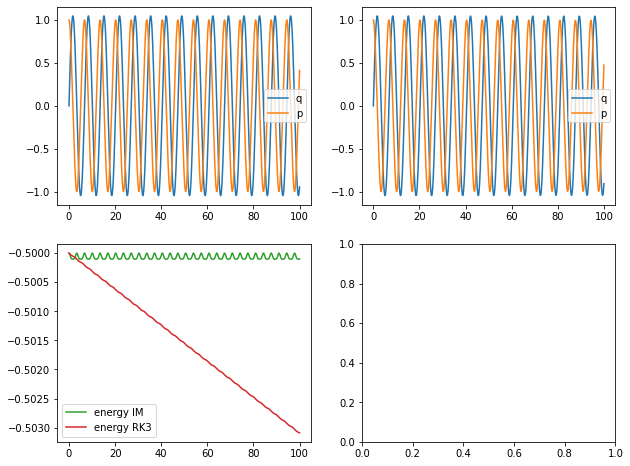

In [285]:
a = lambda x: np.sin(x)
aprime = lambda x: np.cos(x)
#a = lambda x: x
#aprime = lambda x: 1.0
F1 = lambda x, Y: np.array([Y[1], -a(Y[0])], dtype=np.float64) # q = Y[0], p = Y[1]  
dF1dy = lambda x, Y: np.array([[0,1.0],[-aprime(Y[0]),0]], dtype=np.float64)
#F1 = lambda x, Y: np.array([Y[1], -Y[0]]) # q = Y[0], p = Y[1]  
#dF1dy = lambda x, Y: np.array([[0,1.0],[-1.0,0]])

Y0 = np.array([.0,1.0], dtype=np.float64)
XM = 100
h = 0.1
N = int(XM/h)
Y, x = implicitmidpoint_multivariate(F1, Y0, N, XM, dF1dy, x0=0, h=h)
Y3, x3 = RK3(F1, Y0, N, XM)

q = np.asarray(Y)[:,0]
p = np.asarray(Y)[:,1]

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(x,q, label='q')
ax[0,0].plot(x,p, label='p')
q3 = np.asarray(Y3)[:,0]
p3 = np.asarray(Y3)[:,1]
ax[0,1].plot(x3,q3, label='q')
ax[0,1].plot(x3,p3, label='p')
ax[0,0].legend()
ax[0,1].legend()


# energy: 0.5*p^2 - cos(q)
e = []
e3 = []
for i in range(N+1):
    e.append(0.5*p[i]**2-np.cos(q[i]))
    e3.append(0.5*p3[i]**2-np.cos(q3[i]))

ax[1,0].plot(x,e, 'C02',label='energy IM')
ax[1,0].plot(x,e3,'C03', label='energy RK3' )
ax[1,0].legend()
ax[1,0].legend()
pexact = np.cos(x)
qexact = np.sin(x)
#ax[1,1].plot(x, qexact, label='q')
#ax[1,1].plot(x, pexact, label='p')
#ax[1,1].legend()

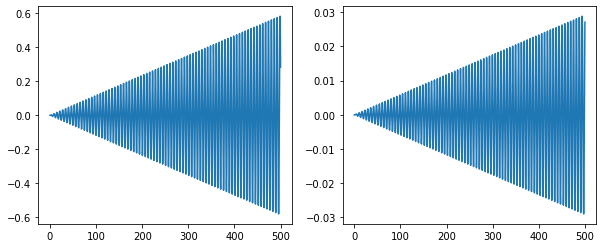

In [283]:
# Error
error = []
error3 = []
eqsum = 0
eq = 0
ep = 0
eq3 = 0
ep3 = 0
for i in range(0,N+1):
    eq = q[i]-qexact[i]
    ep = p[i]-pexact[i]
    error.append(eq+ep)
    eq3 = q3[i]-qexact[i]
    ep3 = p3[i]-pexact[i]
    error3.append(eq3+ep3)
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(x,error)
ax[1].plot(x, error3)

# $3\times 3$ Hamiltonian system

In [5]:
J = np.array([[0,-1,1],[1,0,-1],[-1,1,0]])

F = lambda x, Y: J.dot(np.array([Y[0],Y[1], Y[2]]))
dFdy = lambda x, Y: J

In [6]:
Y0 = np.array([1.0,1.0,0.5], dtype=np.float64)
XM = 100
h = 0.1
N = int(XM/h)
Y, x = implicitmidpoint_multivariate(F, Y0, N, XM, dFdy, x0=0, h=h)
Y3, x3 = RK3(F, Y0, N, XM)

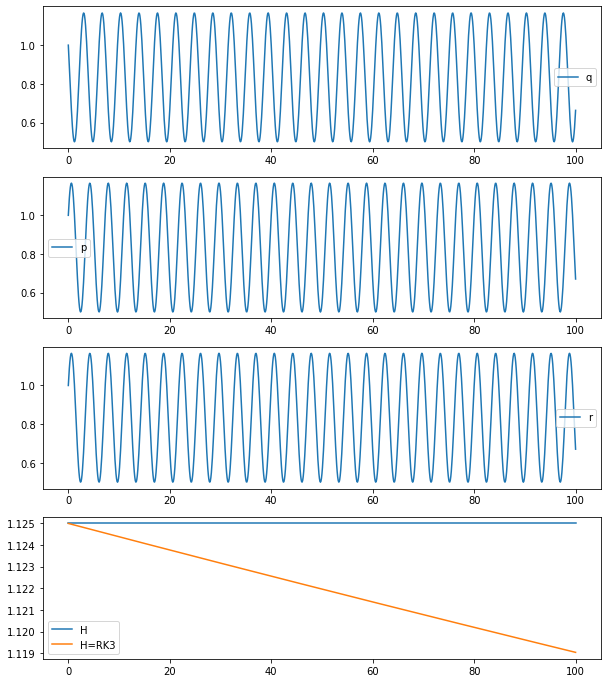

In [7]:
q = np.asarray(Y)[:,0]
p = np.asarray(Y)[:,1]
r = np.asarray(Y)[:,2]

q3 = np.asarray(Y3)[:,0]
p3 = np.asarray(Y3)[:,1]
r3 = np.asarray(Y3)[:,2]
#energy
H = []
H3 = []
for i in range(N+1):
    H.append(0.5*p[i]**2+0.5*q[i]**2 + 0.5*r[i]**2)
    H3.append(0.5*p3[i]**2+0.5*q3[i]**2 + 0.5*r3[i]**2)
fig, ax = plt.subplots(4,1, figsize=(10,12))
ax[0].plot(x,q, label='q')
ax[1].plot(x,p, label='p')
ax[2].plot(x,p, label='r')
ax[3].plot(x,H, label='H')
ax[3].plot(x3,H3, label='H=RK3')
#q3 = np.asarray(Y3)[:,0]
#p3 = np.asarray(Y3)[:,1]
#ax[0,1].plot(x3,q3, label='q')
#ax[0,1].plot(x3,p3, label='p')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

<IPython.core.display.Javascript object>


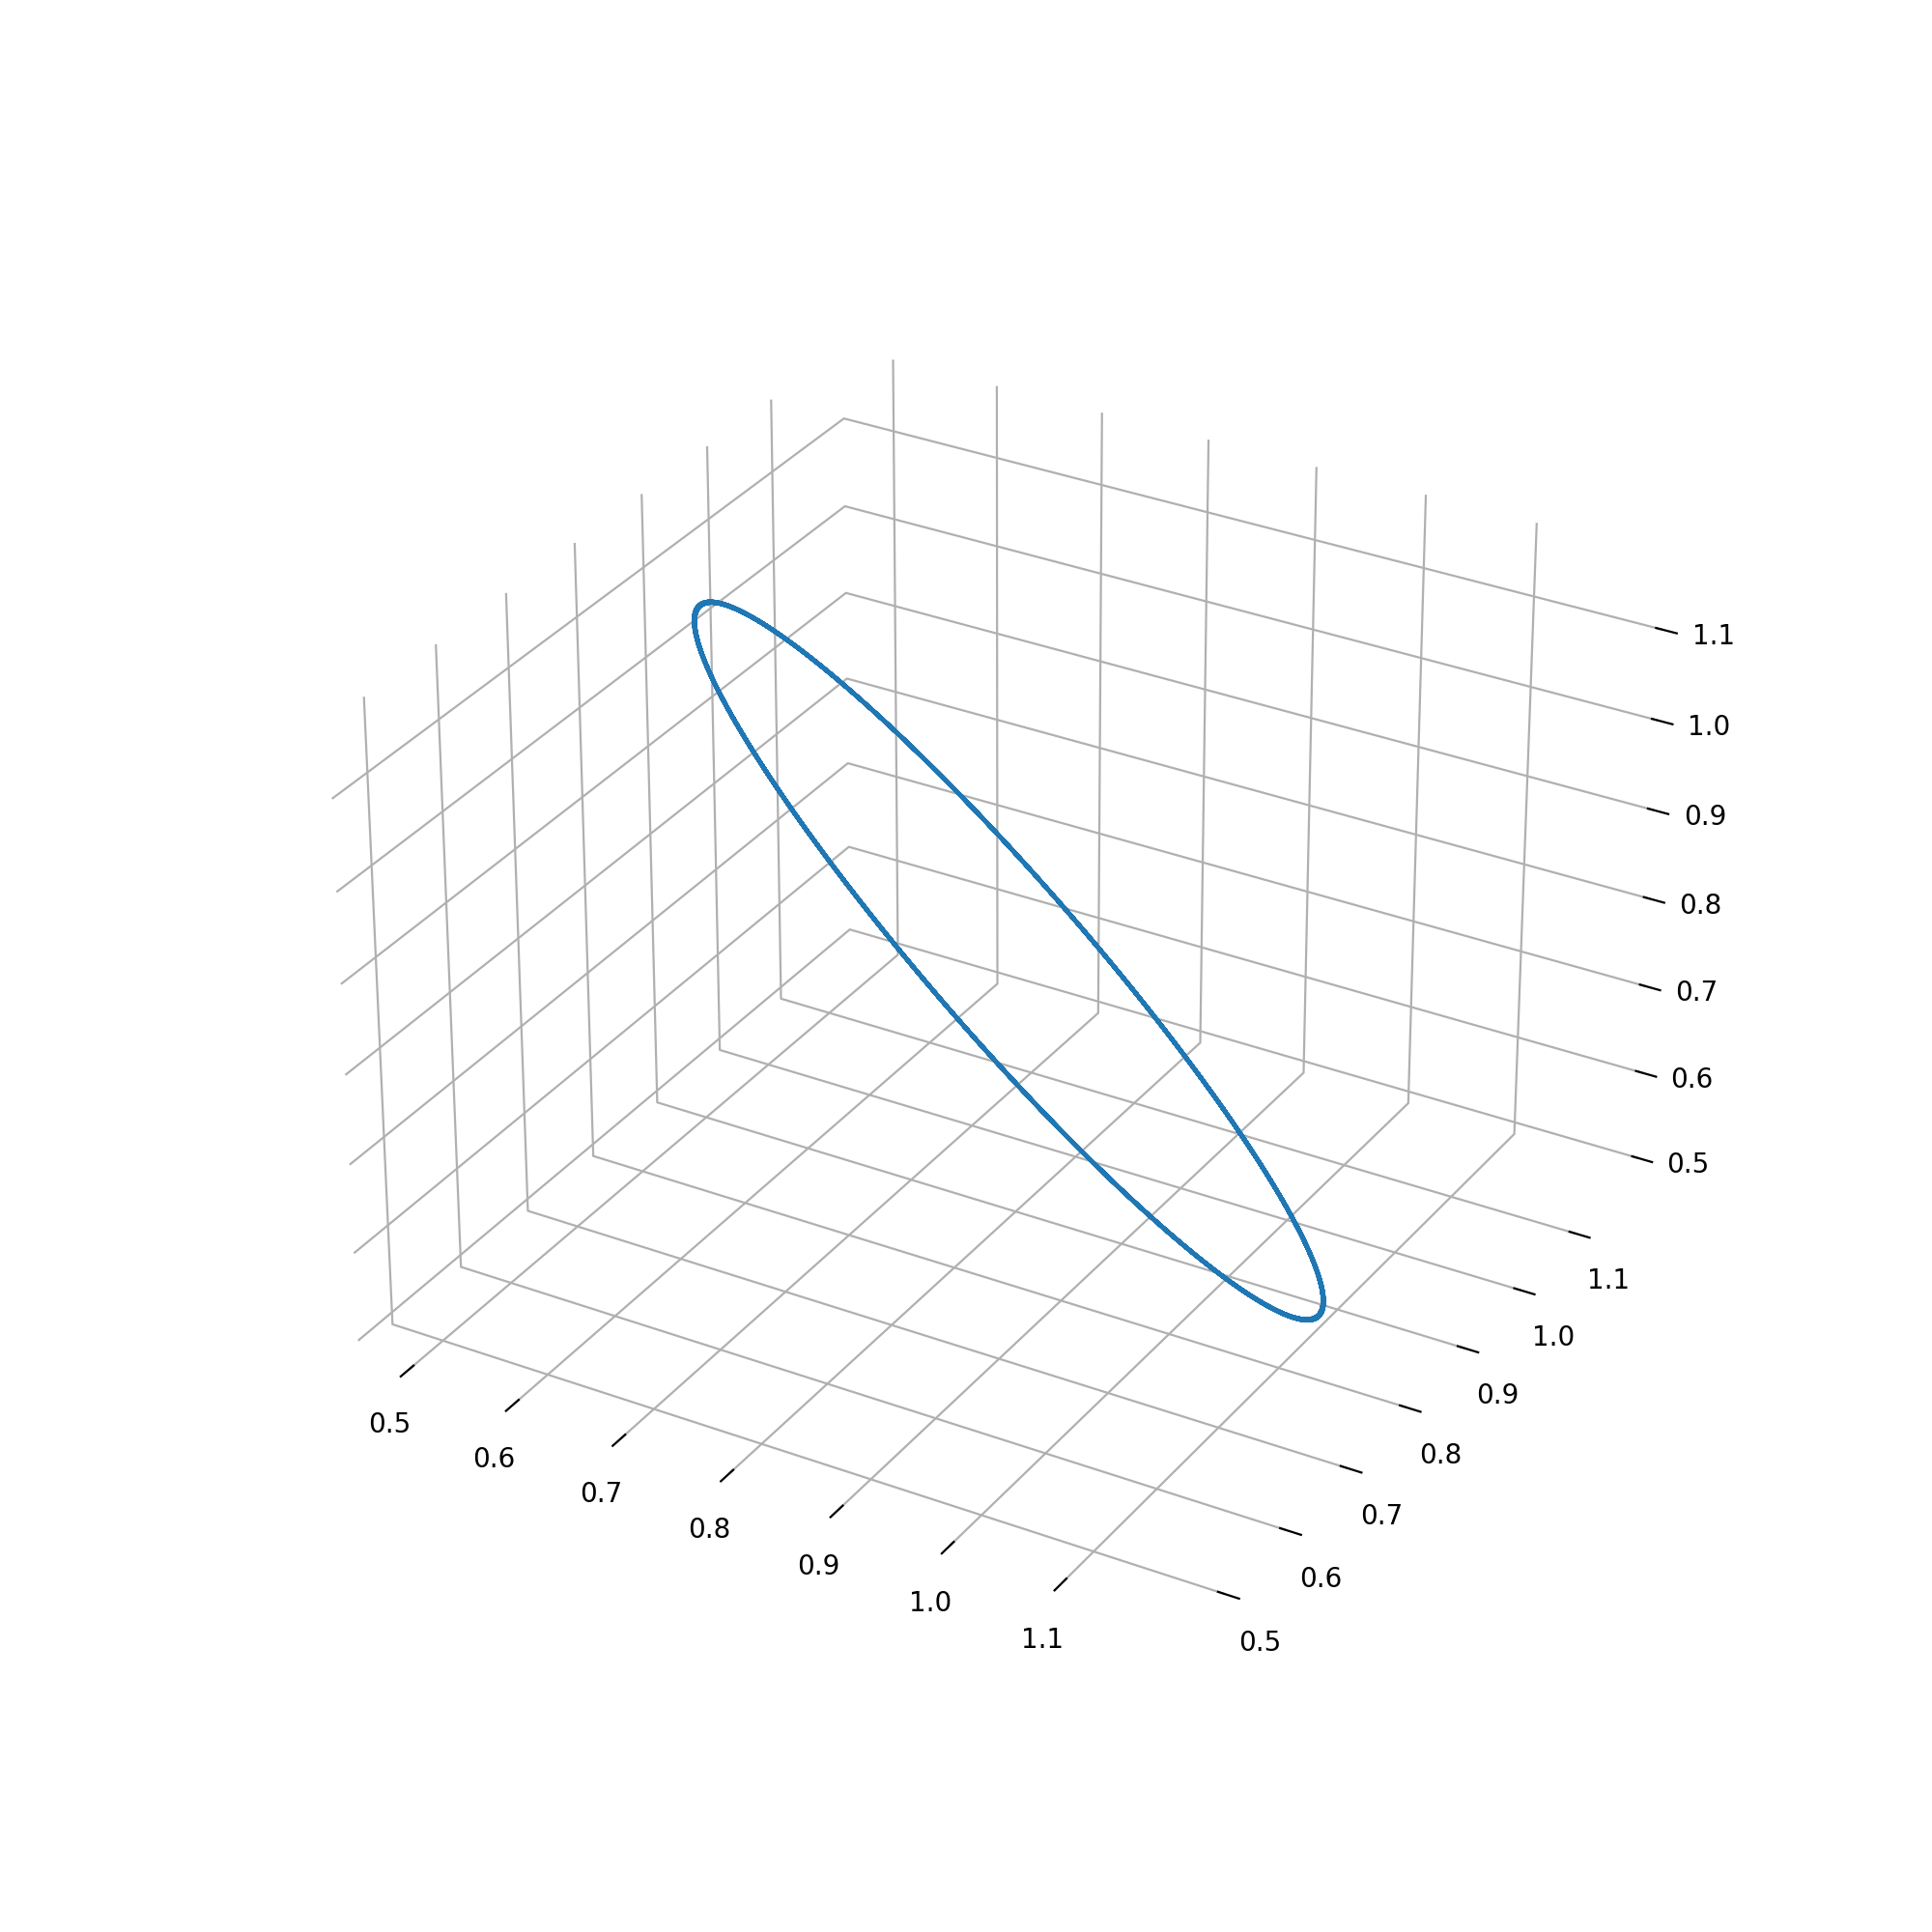

In [7]:
%matplotlib notebook
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.plot(q, p, r, zdir='z', label='curve in (q, p,r)')

# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the ticks
#ax.set_xticks([]) 
#ax.set_yticks([]) 
#ax.set_zticks([])
plt.show()

In [88]:
%matplotlib notebook
# Phase planes 3x3 non canonical Hamiltonian system
from matplotlib import cm
def phase_planes_noncanicalH(axis = [-3,3,-3,3, -3,3], XM = 20, h = 0.1):
    ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
    
    draw_sphere=True
    if draw_sphere:
        r = 3
        u, v = np.mgrid[0:2 * np.pi:200j, 0:np.pi:200j]
        x = r*np.cos(u) * np.sin(v)
        y = r*np.sin(u) * np.sin(v)
        z = r*np.cos(v)
        #ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha=0.5)
        ax.plot_surface(x, y, z, alpha=0.3)
    
    
    J = np.array([[0,-1,1],[1,0,-1],[-1,1,0]])

    F = lambda x, Y: J.dot(np.array([Y[0],Y[1], Y[2]]))
    
    

    xlist = np.linspace(axis[0],axis[1], 10)
    ylist = np.linspace(axis[2],axis[3], 10)
    zlist = np.linspace(axis[4],axis[5], 10)
    Y0list = []
    #for x in xlist:
    #    Y0list.append(np.array([x,0,0]))
    #for y in ylist:
    #    Y0list.append(np.array([axis[0],y,0]))
    #for z in zlist:
    #    Y0list.append(np.array([axis[0],axis[2],z]))
    N=5
    
    t = np.linspace(-3.0*np.sqrt(3),3*np.sqrt(3),N+1, endpoint=False)
    delta = 0.5*(t[1]-t[0])
    radius= 3
    for j in range(0,N+1):
        tt = t[j]+delta
        print(tt)
    #    #p = -3+6*np.random.rand()
    #    q = r[j]#-3+6*np.random.rand()
    #    p = np.sqrt(9-r[j]**2-q**2)
    #    Y0list.append(np.array([q,p,r[j]]))
        p =(2*tt+np.sqrt(6*radius**2-2*tt**2))/6
        q = p
        r = tt - 2*p
        
        Y0list.append(np.array([q,p,r]))
    colors = iter(cm.rainbow(np.linspace(0, 1, len(Y0list))))
    cc = cm.rainbow(np.linspace(0, 1, len(Y0list)))
    h = [h]
    N = [int(XM/hi) for hi in h]
    for i, Y0 in enumerate(Y0list):
        #Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
        Y, x = implicitmidpoint_multivariate(F, Y0, N[0], XM, dFdy, x0=0, h=h[0])
        q = np.asarray(Y)[:,0]
        p = np.asarray(Y)[:,1]
        r = np.asarray(Y)[:,2]
        #ax.plot(q[0],p[0],r[0],'o', color=cc[i], markersize=3)
        #ax.plot(q,p,r, color=cc[i],label='curve in (q, p,r)')
        ax.plot(q[0],p[0],r[0],'o', color='C3', markersize=5)
        ax.plot(q,p,r, color='C3',label='curve in (q, p,r)')
    #plt.gca().set_aspect('equal')
    ax.set_xlim([axis[0],axis[1]])
    ax.set_ylim([axis[2],axis[3]])
    ax.set_zlim([axis[4],axis[5]])
    ax.set_xlabel('q')
    ax.set_ylabel('p')
    ax.set_zlabel('r')
    ax.plot([-3,3],[-3,3],[-3,3],'C7',linewidth=4 )
    
    
    
    



    ax.set_box_aspect([1,1,1])
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    plt.savefig('noncanonicalH_view1')
    ax.view_init(elev=35, azim=45)
    plt.savefig('noncanonicalH_view2')
    plt.show()

<IPython.core.display.Javascript object>


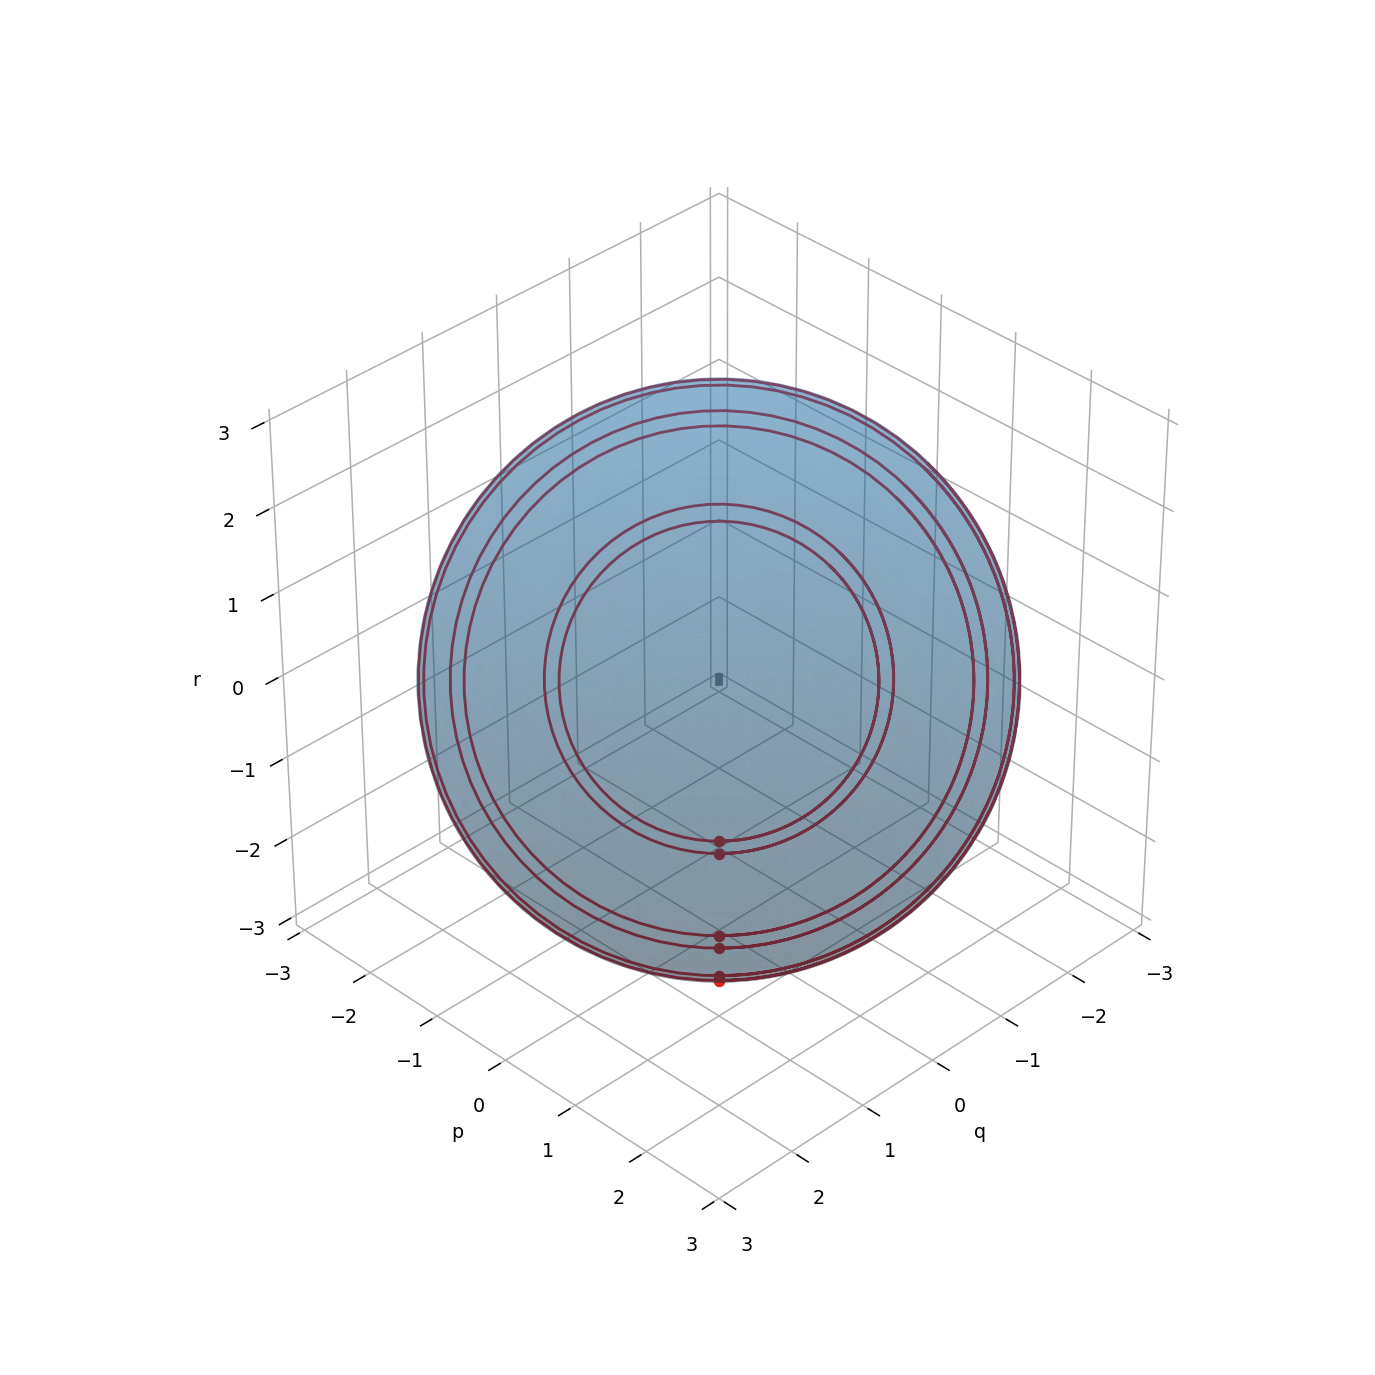

-4.330127018922193
-2.5980762113533156
-0.8660254037844384
0.8660254037844388
2.5980762113533165
4.3301270189221945


In [89]:
phase_planes_noncanicalH(axis = [-3,3,-3,3, -3,3], XM = 5, h = 0.05)

<IPython.core.display.Javascript object>


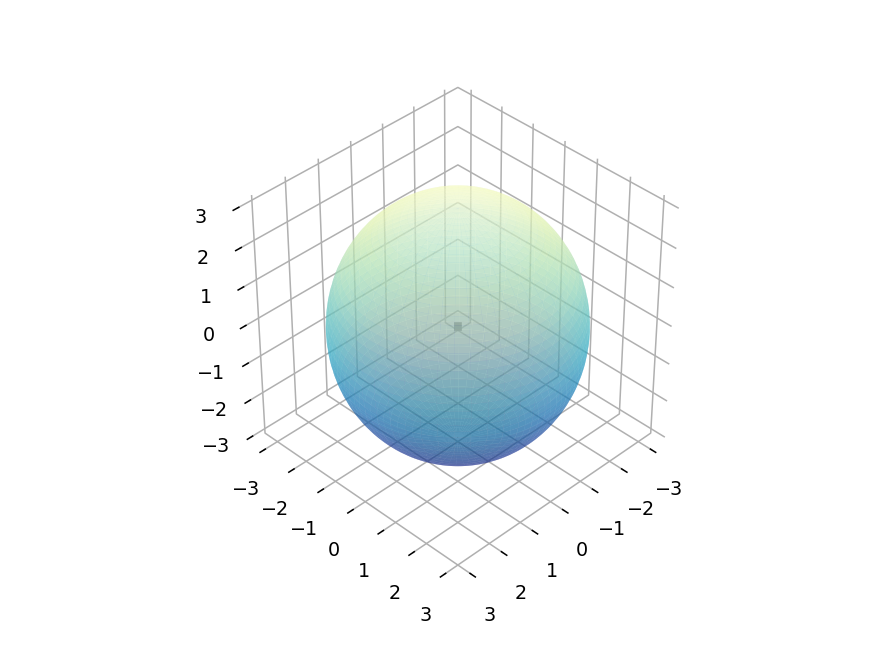

In [81]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')
ax.plot([-3,3],[-3,3],[-3,3],'C7',linewidth=4 )
    
    
    
r = 3
u, v = np.mgrid[0:2 * np.pi:200j, 0:np.pi:200j]
x = r*np.cos(u) * np.sin(v)
y = r*np.sin(u) * np.sin(v)
z = r*np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha=0.5)

ax.set_box_aspect([1,1,1])
    
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(elev=38, azim=45)


<IPython.core.display.Javascript object>


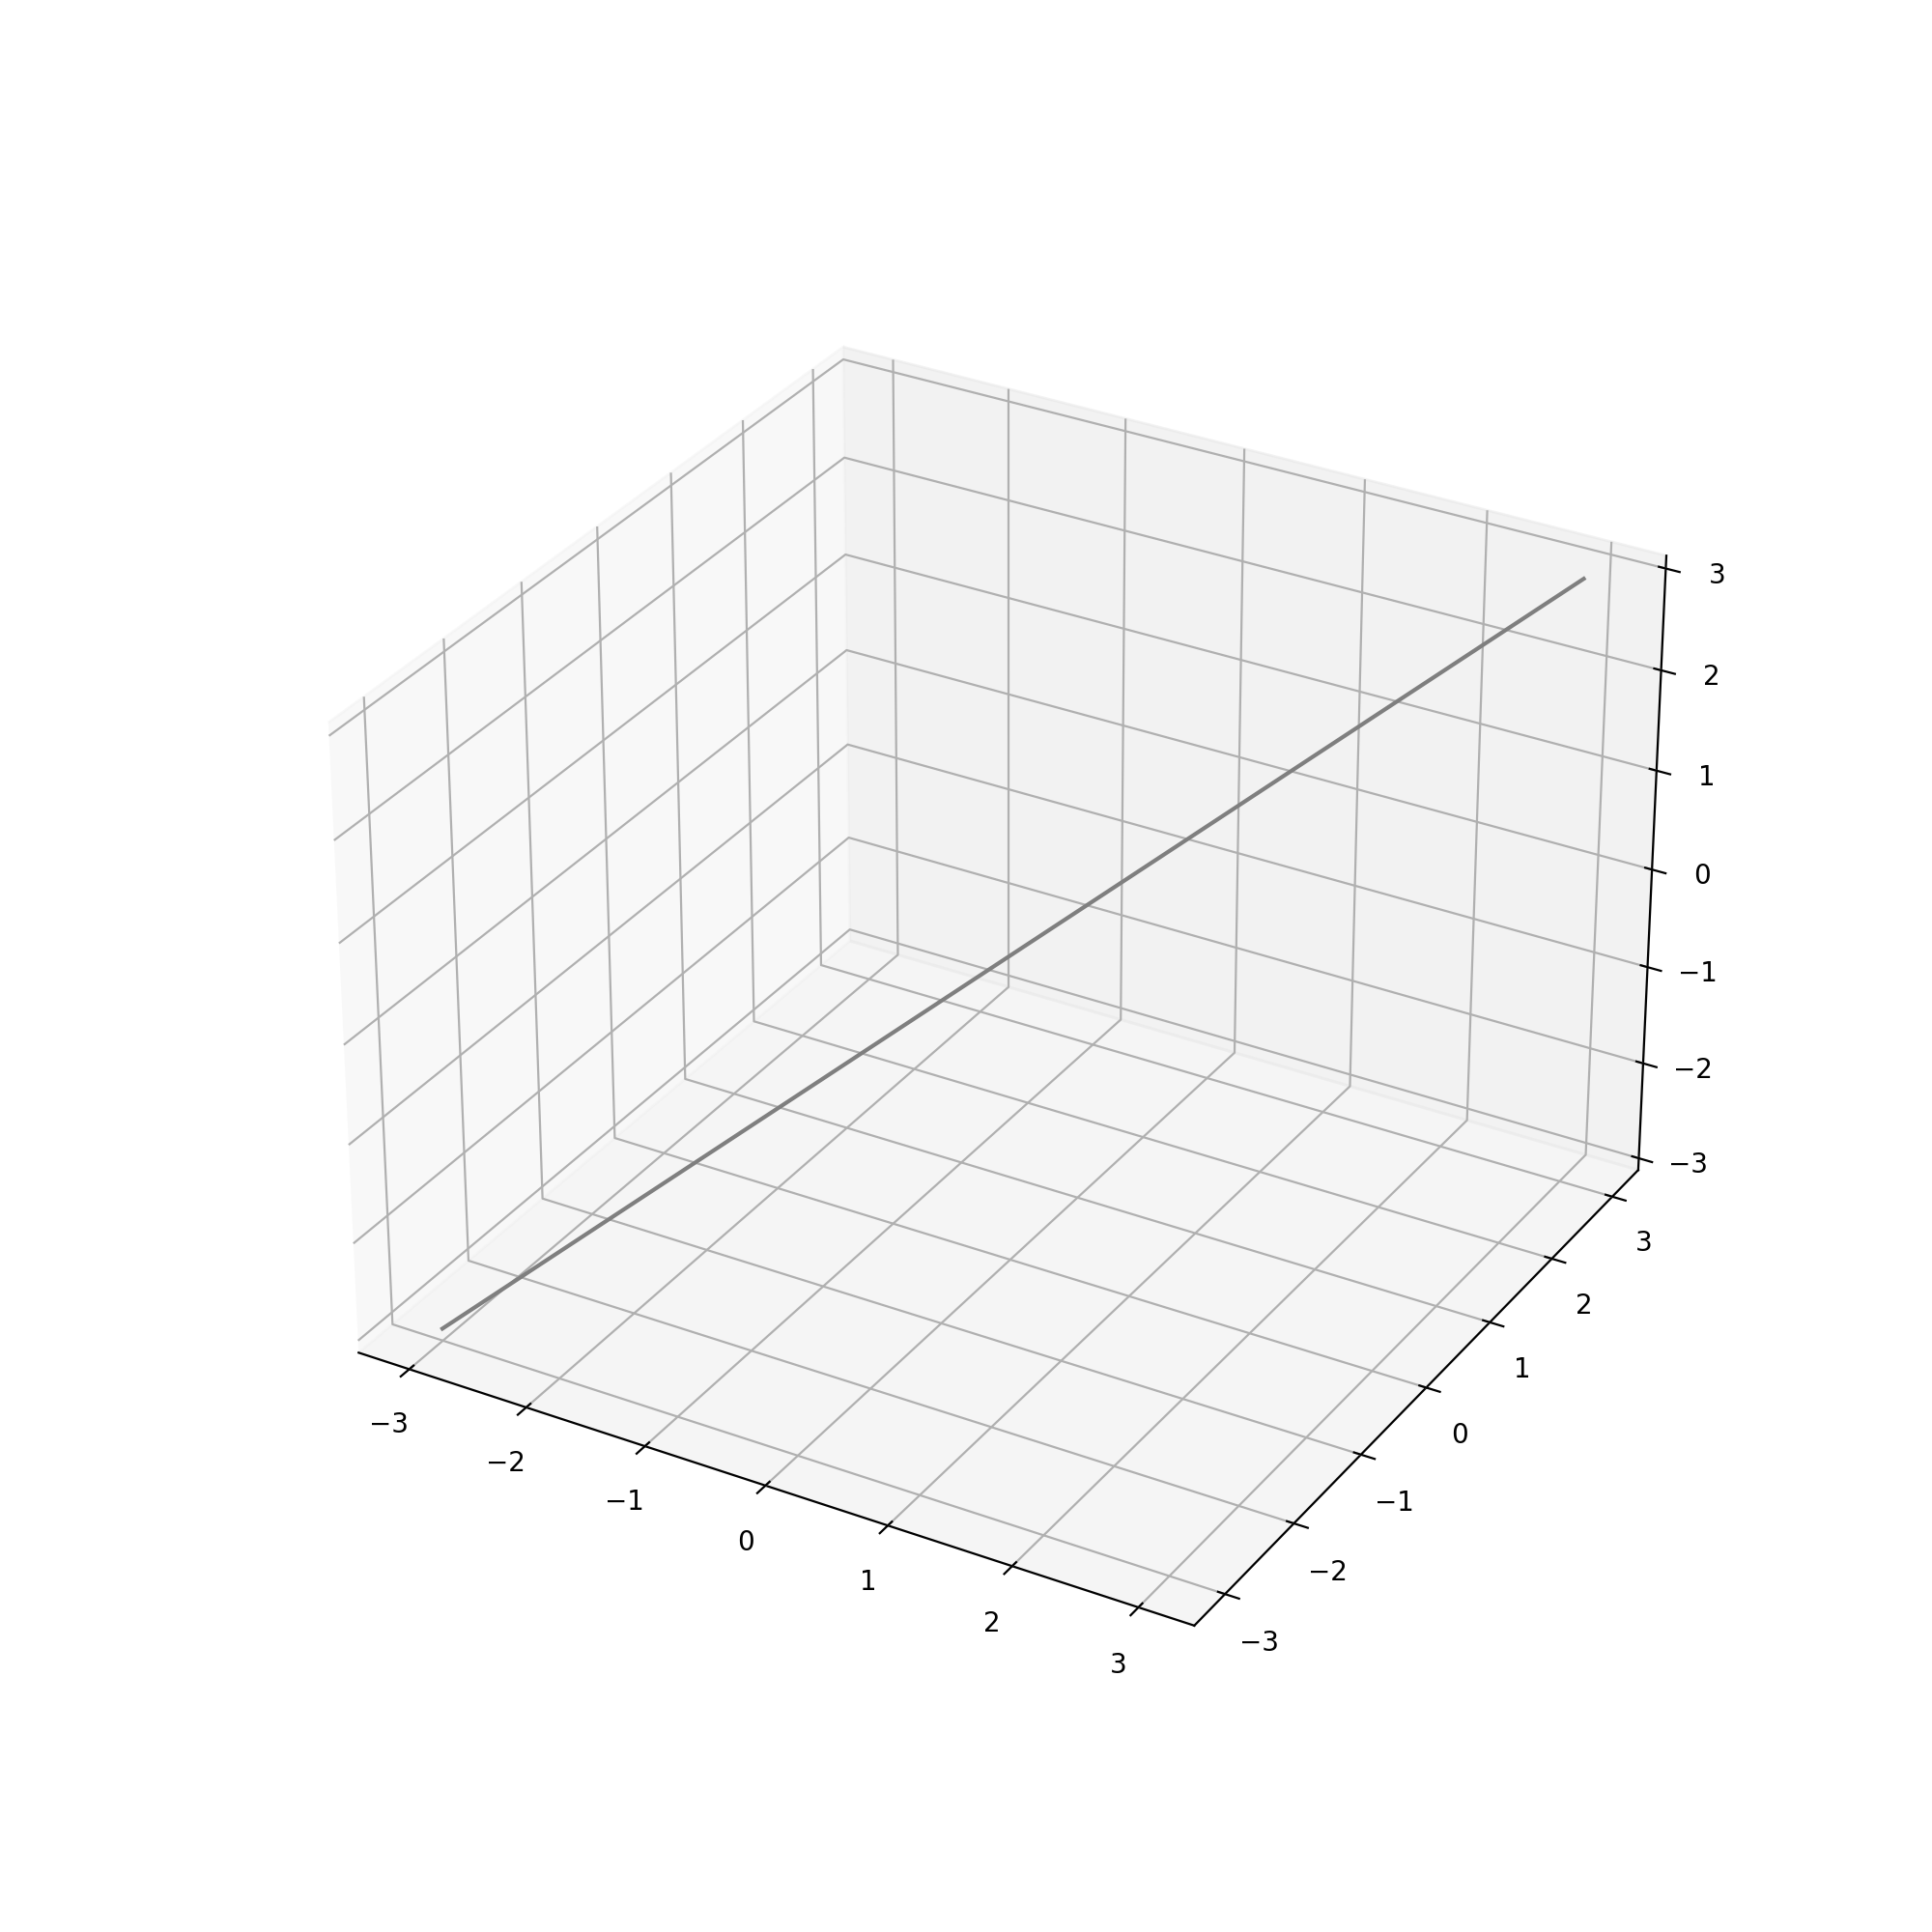

Text(0, 0, '')

In [46]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.plot([-3,3],[-3,3],[-3,3], 'C7')
ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))


In [35]:
J = np.array([[0,-2,1],[2,0,-1],[-1,1,0]]); print("J:", J)
#H = np.array([[1,0,0],[0,1,0],[0,0,1]]); print(H)
H = np.array([[2,1,0],[1,1,-1],[0,-1,-1]]); print("H:", H)
A = J@H; print("A:", A)
I = np.eye(3)

J: [[ 0 -2  1]
 [ 2  0 -1]
 [-1  1  0]]
H: [[ 2  1  0]
 [ 1  1 -1]
 [ 0 -1 -1]]
A: [[-2 -3  1]
 [ 4  3  1]
 [-1  0 -1]]


In [43]:
dt = 0.5
# z \in Range(J)
z = J.dot(np.random.rand(3))
Hn = 0.5*z.dot(H.dot(z));print("H_n = ",Hn)
b = (I+dt/2*A).dot(z)
znext = np.linalg.solve((I-dt/2*A),b) 
Hnext = 0.5*znext.dot(H.dot(znext));print("H_{n+1} = ",Hnext)

H_n =  0.3971050591999258
H_{n+1} =  0.3971050591999258


In [53]:
dt = 0.5
# z \in Kernel(J)
z = np.random.rand(1)*np.array([1,1,2])

print("J*z:",J.dot(z))
Hn = 0.5*z.dot(H.dot(z));print("H_n = ",Hn)
b = (I+dt/2*A).dot(z)


znext = np.linalg.solve((I-dt/2*A),b) 

b2 = (I-dt/2*A).dot(z)
zinv = np.linalg.solve((I+dt/2*A), b2)

print("E(z):",znext,"\n E^{-1}(z):", zinv)
print(znext-zinv)
vkerJ = np.array([1,1,1])
Pz = proj_v(znext,vkerJ);
Jw = znext-Pz
print(Pz, Jw)
Hnext = 0.5*znext.dot(H.dot(znext));print("H_{n+1} = ",Hnext)

H1 = Hamil(H,Jw)
H2 = Pz.dot(H.dot(Jw))
H3 = Hamil(H, Pz)

print("Jw:", Jw, "\n 2*Pz:",2*Pz)
print("H1:",H1,"H2:",H2, "H3:",H3, "sum:",H1+H2+H3)


thetavv = znext.dot(H.dot(znext)) - z.dot(H.dot(z))
print("\Theta_vv :", thetavv)

#t31 = -z.dot(H.dot(zinv)) 
print("\n \n")
t31 = -zinv.dot(H.dot(z))
t32 = znext.dot(H.dot(z))
#t32 = z.dot()
t3 = t31 + t32
print("E(z):",znext,"\n E^{-1}(z):", zinv)
print("term 31:", t31, "term 32:", t32)
print("term 3:", t3)

Q = (I-dt/2*A)
P = (I+dt/2*A)
Eh = np.linalg.inv(Q)@P
Eh2 = P@np.linalg.inv(Q)
Ehinv = np.linalg.inv((I+dt/2*A))@(I-dt/2*A)

print(H@Ehinv, Eh.T@H)
print("Eh:\n", Eh,"\n Eh2:\n", Eh2)
print(Ehinv, Eh.T)

print(A@np.linalg.inv(Q) - np.linalg.inv(Q)@A)

J*z: [0. 0. 0.]
H_n =  -0.027718451187502192
E(z): [-0.30894856  0.7291186   0.19772708] 
 E^{-1}(z): [-0.01235794 -0.16065325  0.49431769]
[-0.29659062  0.88977185 -0.29659062]
[0.20596571 0.20596571 0.20596571] [-0.51491426  0.52315289 -0.00823863]
H_{n+1} =  -0.0277184511875022
Jw: [-0.51491426  0.52315289 -0.00823863] 
 2*Pz: [0.41193141 0.41193141 0.41193141]
H1: 0.13687841230730732 H2: -0.20701873552955424 H3: 0.042421872034744706 sum: -0.027718451187502213
\Theta_vv : -1.3877787807814457e-17

 

E(z): [-0.30894856  0.7291186   0.19772708] 
 E^{-1}(z): [-0.01235794 -0.16065325  0.49431769]
term 31: 0.20662845430683457 term 32: -0.20662845430683457
term 3: 0.0
[[ 0.63636364  1.27272727 -1.63636364]
 [-0.90909091  0.18181818 -2.09090909]
 [ 0.54545455  0.09090909 -1.54545455]] [[ 0.63636364  1.27272727 -1.63636364]
 [-0.90909091  0.18181818 -2.09090909]
 [ 0.54545455  0.09090909 -1.54545455]]
Eh:
 [[-0.54545455 -1.36363636 -0.18181818]
 [ 1.72727273  1.81818182  0.90909091]
 [-0.09

In [41]:
def Hamil(H,z):
    return 0.5*z.dot(H.dot(z))
dt = 0.5
# z not \in Kernel(J)
z = np.random.rand(3)
Hn = 0.5*z.dot(H.dot(z));print("H_n = ",Hn)
b = (I+dt/2*A).dot(z)
znext = np.linalg.solve((I-dt/2*A),b) 
Hnext = 0.5*znext.dot(H.dot(znext));print("H_{n+1} = ",Hnext)

vkerJ = np.array([1,1,1])
Pz = proj_v(znext,vkerJ);
Jw = znext-Pz

H1 = Hamil(H,Jw)
H2 = Pz.dot(H.dot(Jw))
H3 = Hamil(H, Pz)
print(H1,H2, H3, H1+H2+H3)

H_n =  0.7067340590796396
H_{n+1} =  0.7067340590796394
4.851296436896648 -5.112141727738092 0.9675793499210839 0.7067340590796398


In [42]:
def proj_v(z,v):
    return (1/(v.dot(v)))*z.dot(v)*v
z = np.random.rand(3)
vkerJ = np.array([1,1,1])
Pz = proj_v(z,vkerJ);
Jw = z-Pz
print(z, Pz, Jw)

[0.87427576 0.96351122 0.68028307] [0.83935668 0.83935668 0.83935668] [ 0.03491908  0.12415453 -0.15907361]


In [136]:
%matplotlib notebook
# Phase planes 3x3 non canonical Hamiltonian system
from matplotlib import cm
def phase_planes_noncanicalH_2(axis = [-3,3,-3,3, -3,3], XM = 20, h = 0.1):
    ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
    
    draw_sphere=False
    if draw_sphere:
        r = 3
        u, v = np.mgrid[0:2 * np.pi:200j, 0:np.pi:200j]
        x = r*np.cos(u) * np.sin(v)
        y = r*np.sin(u) * np.sin(v)
        z = r*np.cos(v)
        #ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha=0.5)
        ax.plot_surface(x, y, z, alpha=0.3)
    
    
    J = np.array([[0,-1,1],[1,0,-1],[-1,1,0]])
    H = np.array([[2,1,0],[1,1,-1],[0,-1,-1]]); print(H)
    F = lambda x, Y: J@H.dot(np.array([Y[0],Y[1], Y[2]]))
    
    

    xlist = np.linspace(axis[0],axis[1], 10)
    ylist = np.linspace(axis[2],axis[3], 10)
    zlist = np.linspace(axis[4],axis[5], 10)
    Y0list = []
    #for x in xlist:
    #    Y0list.append(np.array([x,0,0]))
    #for y in ylist:
    #    Y0list.append(np.array([axis[0],y,0]))
    #for z in zlist:
    #    Y0list.append(np.array([axis[0],axis[2],z]))
    N=5
    
    t = np.linspace(-3.0*np.sqrt(3),3*np.sqrt(3),N+1, endpoint=False)
    delta = 0.5*(t[1]-t[0])
    radius= 3
    for j in range(0,N+1):
        tt = t[j]+delta
        print(tt)
    #    #p = -3+6*np.random.rand()
    #    q = r[j]#-3+6*np.random.rand()
    #    p = np.sqrt(9-r[j]**2-q**2)
    #    Y0list.append(np.array([q,p,r[j]]))
        p =(2*tt+np.sqrt(6*radius**2-2*tt**2))/6
        q = p
        r = tt - 2*p
        
        Y0list.append(np.array([q,p,r]))
    colors = iter(cm.rainbow(np.linspace(0, 1, len(Y0list))))
    cc = cm.rainbow(np.linspace(0, 1, len(Y0list)))
    h = [h]
    N = [int(XM/hi) for hi in h]
    for i, Y0 in enumerate(Y0list):
        #Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
        Y, x = implicitmidpoint_multivariate(F, Y0, N[0], XM, dFdy, x0=0, h=h[0])
        q = np.asarray(Y)[:,0]
        p = np.asarray(Y)[:,1]
        r = np.asarray(Y)[:,2]
        #ax.plot(q[0],p[0],r[0],'o', color=cc[i], markersize=3)
        #ax.plot(q,p,r, color=cc[i],label='curve in (q, p,r)')
        ax.plot(q[0],p[0],r[0],'o', color='C3', markersize=5)
        ax.plot(q,p,r, color='C3',label='curve in (q, p,r)')
    #plt.gca().set_aspect('equal')
    #ax.set_xlim([axis[0],axis[1]])
    #ax.set_ylim([axis[2],axis[3]])
    #ax.set_zlim([axis[4],axis[5]])
    ax.set_xlabel('q')
    ax.set_ylabel('p')
    ax.set_zlabel('r')
    ax.plot([-3,3],[-3,3],[-3,3],'C7',linewidth=4 )
    
    
    
    



    ax.set_box_aspect([1,1,1])
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    plt.savefig('noncanonicalH_view1')
    ax.view_init(elev=35, azim=45)
    plt.savefig('noncanonicalH_view2')
    plt.show()

<IPython.core.display.Javascript object>


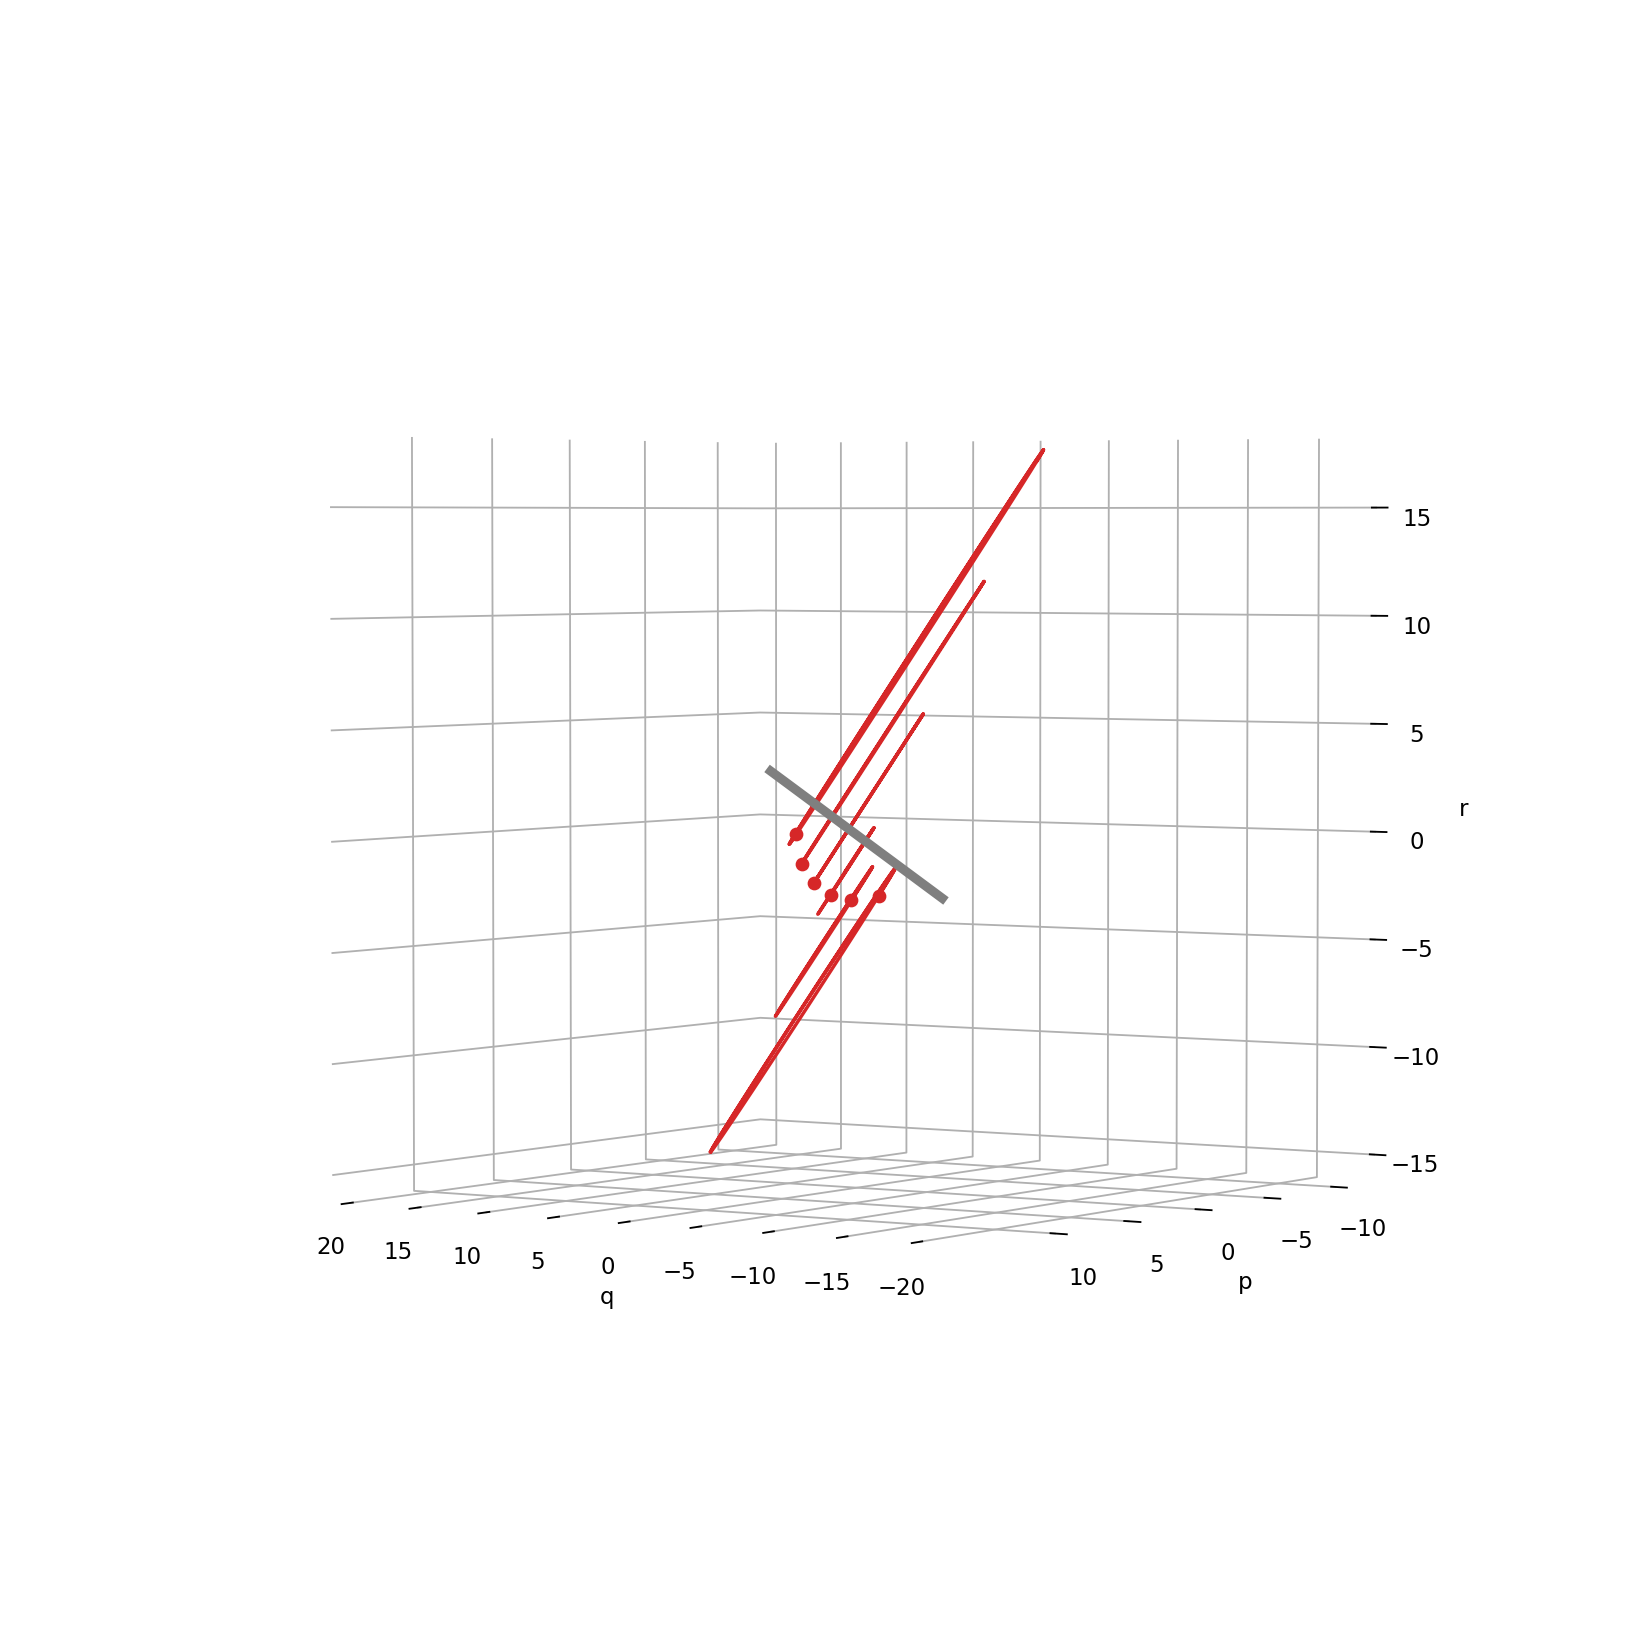

[[ 2  1  0]
 [ 1  1 -1]
 [ 0 -1 -1]]
-4.330127018922193
-2.5980762113533156
-0.8660254037844384
0.8660254037844388
2.5980762113533165
4.3301270189221945


In [137]:
phase_planes_noncanicalH_2(axis = [-3,3,-3,3, -3,3], XM = 10, h = 0.05)